In [23]:
# Run this code cell to import relevant libraries

import numpy as np
import pandas as pd
import seaborn as sns

In [24]:
hotels = pd.read_csv("hotels.csv")
hotels = hotels.fillna(0)
hotels = hotels.drop(columns = ["company","reservation_status","reservation_status_date", "country", "market_segment", "distribution_channel"])
# print(hotels.head(5))


In [25]:
from sklearn.preprocessing import OneHotEncoder

tar = hotels[hotels["adr"] > 0]
target = tar["adr"]
tot = tar.drop(columns = ["adr"])
cats = tar[["hotel","arrival_date_month", "customer_type", "meal", "reserved_room_type","assigned_room_type", "deposit_type"]].astype(str).values
categorical = OneHotEncoder().fit_transform(cats).toarray()
numerical = tot.drop(columns = ["hotel","arrival_date_month", "customer_type", "meal", "reserved_room_type","assigned_room_type", "deposit_type"]).values
data = np.append(categorical, numerical, axis=1)


In [26]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.3, random_state=216)

In [27]:
# This is a linear regression on all the data we have from our desired dataset with an ADR > 0
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linear_model = LinearRegression()
linear_model.fit(X=data, y=target)
predicted = linear_model.predict(data)

mse = mean_squared_error(target, predicted)
r2 = r2_score(target, predicted)
print("Mean Squared Error:", mse)
print("R-Sqaured", r2)

Mean Squared Error: 1110.0029874109546
R-Sqaured 0.5414146047723063


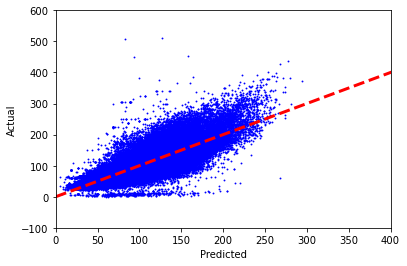

In [28]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.scatter(predicted, target, s = 0.75, edgecolors=(0, 0, 1))
plt.xlim([0, 400])
plt.ylim([-100, 600])
ax.plot([0, 600], [0, 600], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Mean Squared Error: 1667.9780977356384
R-Sqaured 0.31089339050756726


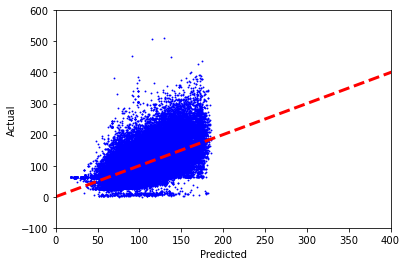

In [32]:
#This group is the part of the data set with information solely about the logistics of the stay, not the customer preferences or the hotel itself
group1 = hotels[hotels["adr"] > 0]
target1 = group1["adr"]
tot1 = group1.drop(columns = ["adr"])
cats1 = group1[["arrival_date_month"]].astype(str).values
categorical1 = OneHotEncoder().fit_transform(cats1).toarray()
numerical1 = group1[["is_canceled", "lead_time", "arrival_date_year", "arrival_date_week_number", "arrival_date_day_of_month", "stays_in_weekend_nights", "stays_in_week_nights", "days_in_waiting_list"]].values
data1 = np.append(categorical1, numerical1, axis=1)

train_data, test_data, train_target, test_target = train_test_split(
    data1, target1, test_size=0.3, random_state=216)

linear_model = LinearRegression()
linear_model.fit(X=data1, y=target1)
predicted1 = linear_model.predict(data1)

mse1 = mean_squared_error(target1, predicted1)
r21 = r2_score(target1, predicted1)
print("Mean Squared Error:", mse1)
print("R-Sqaured", r21)

fig, ax = plt.subplots()
ax.scatter(predicted1, target1, s = 0.75, edgecolors=(0, 0, 1))
plt.xlim([0, 400])
plt.ylim([-100, 600])
ax.plot([0, 600], [0, 600], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Mean Squared Error: 1832.1720357248973
R-Sqaured 0.24305849024083603


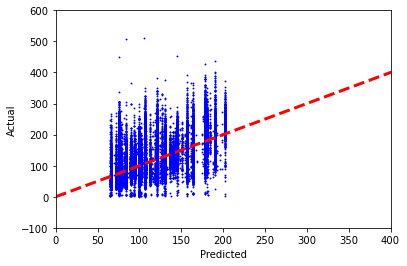

In [33]:
#This group is the part of the data set with information solely about the hotel itself, not the customer preferences or the logistics of the trip
group2 = hotels[hotels["adr"] > 0]
target2 = group2["adr"]
tot2 = group2.drop(columns = ["adr"])
cats2 = group2[["hotel", "reserved_room_type","assigned_room_type"]].astype(str).values
categorical2 = OneHotEncoder().fit_transform(cats2).toarray()
numerical2 = group2[["is_canceled", "lead_time", "arrival_date_year", "arrival_date_week_number", "arrival_date_day_of_month", "stays_in_weekend_nights", "stays_in_week_nights", "days_in_waiting_list"]].values
data2 = categorical2

train_data, test_data, train_target, test_target = train_test_split(
    data2, target2, test_size=0.3, random_state=216)

linear_model = LinearRegression()
linear_model.fit(X=data2, y=target2)
predicted2 = linear_model.predict(data2)

mse2 = mean_squared_error(target2, predicted2)
r22 = r2_score(target2, predicted2)
print("Mean Squared Error:", mse2)
print("R-Sqaured", r22)

fig, ax = plt.subplots()
ax.scatter(predicted2, target2, s = 0.75, edgecolors=(0, 0, 1))
plt.xlim([0, 400])
plt.ylim([-100, 600])
ax.plot([0, 600], [0, 600], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Mean Squared Error: 1874.2218179599258
R-Sqaured 0.22568609014444807


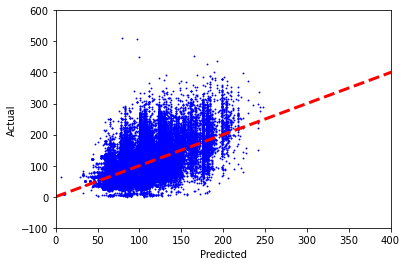

In [34]:
#This group is the part of the data set with information solely about the customer themselves, not the logistics of the trip or the hotel itself
group3 = hotels[hotels["adr"] > 0]
target3 = group3["adr"]
tot3 = group3.drop(columns = ["adr"])
cats3 = group3[["meal", "customer_type"]].astype(str).values
categorical3 = OneHotEncoder().fit_transform(cats3).toarray()
numerical3 = group3[["adults", "children", "babies", "is_repeated_guest", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "agent", "required_car_parking_spaces"]].values
data3 = np.append(categorical3, numerical3, axis=1)

train_data, test_data, train_target, test_target = train_test_split(
    data3, target3, test_size=0.3, random_state=216)

linear_model = LinearRegression()
linear_model.fit(X=data3, y=target3)
predicted3 = linear_model.predict(data3)

mse3 = mean_squared_error(target3, predicted3)
r23 = r2_score(target3, predicted3)
print("Mean Squared Error:", mse3)
print("R-Sqaured", r23)

fig, ax = plt.subplots()
ax.scatter(predicted3, target3, s = 0.75, edgecolors=(0, 0, 1))
plt.xlim([0, 400])
plt.ylim([-100, 600])
ax.plot([0, 600], [0, 600], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Mean Squared Error: 843.0415004943258
R-Sqaured 0.6081744424480701


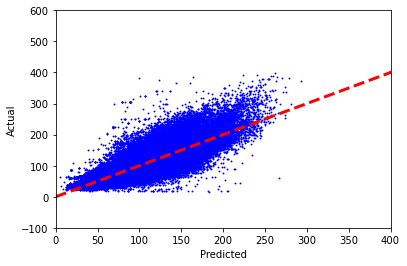

In [37]:
#Code for graphs of linear regressions for when we isolate to ADR of above 15 only
gt151 = hotels[hotels["adr"] > 15]
gt15 = gt151[gt151["adr"] < 400]
target15 = gt15["adr"]
tot15 = gt15.drop(columns = ["adr"])
cats15 = gt15[["hotel","arrival_date_month", "customer_type", "meal", "reserved_room_type","assigned_room_type", "deposit_type"]].astype(str).values
categorical15 = OneHotEncoder().fit_transform(cats15).toarray()
numerical15 = tot15.drop(columns = ["hotel","arrival_date_month", "customer_type", "meal", "reserved_room_type","assigned_room_type", "deposit_type"]).values
data15 = np.append(categorical15, numerical15, axis=1)

train_data, test_data, train_target, test_target = train_test_split(
    data15, target15, test_size=0.3, random_state=216)

linear_model = LinearRegression()
linear_model.fit(X=data15, y=target15)
predicted15 = linear_model.predict(data15)

mse15 = mean_squared_error(target15, predicted15)
r215 = r2_score(target15, predicted15)
print("Mean Squared Error:", mse15)
print("R-Sqaured", r215)

fig, ax = plt.subplots()
ax.scatter(predicted15, target15, s = 0.75, edgecolors=(0, 0, 1))
plt.xlim([0, 400])
plt.ylim([-100, 600])
ax.plot([0, 600], [0, 600], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Mean Squared Error: 1721.7343145093814
R-Sqaured 0.28868460711263955


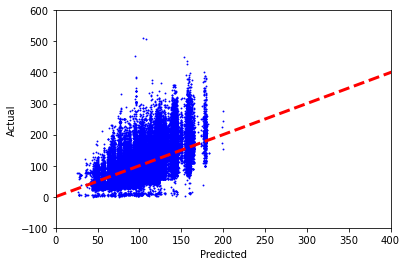

In [38]:
#Code for the five categories I am assuming may be most influential in the price of the hotel to see how it compares. They are 'adults', 'stay_in_week_nights', 'stay_in_weekend_nights', 'arrival_date_year', and 'arrival_date_month'
special = hotels[hotels["adr"] > 0]
targetS = special["adr"]
totS = special.drop(columns = ["adr"])
catsS = special[["arrival_date_month"]].astype(str).values
categoricalS = OneHotEncoder().fit_transform(catsS).toarray()
numericalS = special[["arrival_date_year", "stays_in_weekend_nights", "stays_in_week_nights", "adults"]].values
dataS = np.append(categoricalS, numericalS, axis=1)

train_data, test_data, train_target, test_target = train_test_split(
    dataS, targetS, test_size=0.3, random_state=216)

linear_model = LinearRegression()
linear_model.fit(X=dataS, y=targetS)
predictedS = linear_model.predict(dataS)

mseS = mean_squared_error(targetS, predictedS)
r2S = r2_score(targetS, predictedS)
print("Mean Squared Error:", mseS)
print("R-Sqaured", r2S)

fig, ax = plt.subplots()
ax.scatter(predictedS, targetS, s = 0.75, edgecolors=(0, 0, 1))
plt.xlim([0, 400])
plt.ylim([-100, 600])
ax.plot([0, 600], [0, 600], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Mean Squared Error: 2361.8514672808587
R-Sqaured 0.02422732111881909


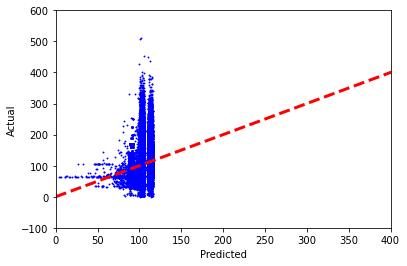

In [40]:
#This is a regression on the five categories I thought would be least influential in the ADR
nspecial = hotels[hotels["adr"] > 0]
targetN = nspecial["adr"]
totN = nspecial.drop(columns = ["adr"])
catsN = nspecial[["deposit_type"]].astype(str).values
categoricalN = OneHotEncoder().fit_transform(catsN).toarray()
numericalN = nspecial[["arrival_date_day_of_month", "agent", "previous_bookings_not_canceled", "is_canceled"]].values
dataN = np.append(categoricalN, numericalN, axis=1)

train_data, test_data, train_target, test_target = train_test_split(
    dataN, targetN, test_size=0.3, random_state=216)

linear_model = LinearRegression()
linear_model.fit(X=dataN, y=targetN)
predictedN = linear_model.predict(dataN)

mseN = mean_squared_error(targetN, predictedN)
r2N = r2_score(targetN, predictedN)
print("Mean Squared Error:", mseN)
print("R-Sqaured", r2N)

fig, ax = plt.subplots()
ax.scatter(predictedN, targetN, s = 0.75, edgecolors=(0, 0, 1))
plt.xlim([0, 400])
plt.ylim([-100, 600])
ax.plot([0, 600], [0, 600], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

/var/folders/_9/z29gxrtj2096j1_l7m3n7gz40000gn/T/ipykernel_9952/1715176153.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.catplot(data = tar[hotels["adr"] <= 5000], x = "arrival_date_year", y = "adr", kind = "box")


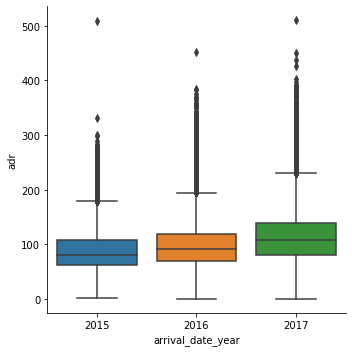

In [41]:
sns.catplot(data = tar[hotels["adr"] <= 5000], x = "arrival_date_year", y = "adr", kind = "box")

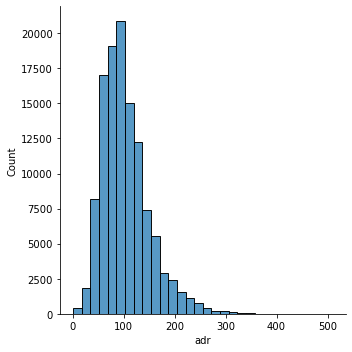

In [42]:
sns.displot(data = tar[tar["adr"] <= 5000], x = "adr", kind = "hist", bins = 30)

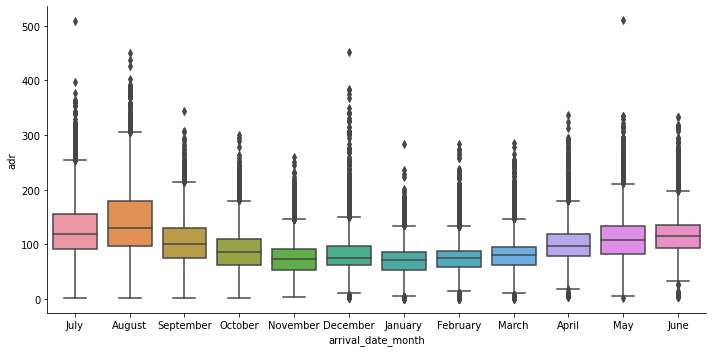

In [43]:
sns.catplot(data = tar[tar["adr"] < 5000], x= "arrival_date_month", y = "adr", kind = "box", aspect = 2)

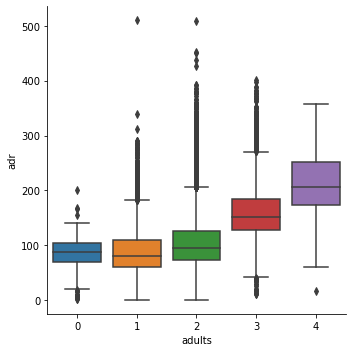

In [44]:
sns.catplot(data = tar[(tar["adr"] < 5000) & (tar["adults"] <5)] , x= "adults", y = "adr", kind = "box")

In [45]:
grouped = tar[tar["adr"] <= 5000].groupby("stays_in_week_nights").mean().sort_values(by = "adr", ascending = True)

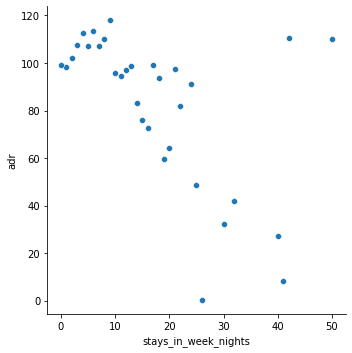

In [46]:
sns.relplot(data = grouped , x= "stays_in_week_nights", y = "adr")

In [24]:
#data = pd.read_csv("hotels.csv")
#data.drop(inplace=True, axis=1, labels=['agent', 'company','hotel','reservation_status_date'])
#data.fillna(data.mode().iloc[0], inplace=True)

In [9]:
#X = data.iloc[:,1:]
#y = data.iloc[:,0]

In [10]:
#from sklearn.compose import make_column_transformer
#ct = make_column_transformer(
#    (OneHotEncoder(),['meal','distribution_channel','reservation_status','country','arrival_date_month','market_segment','deposit_type','customer_type', 'reserved_room_type','assigned_room_type' ]), remainder = 'passthrough'
#    )
#X = ct.fit_transform(X).toarray()

In [11]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [13]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 100)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
#explained_variance = pca.explained_variance_ratio_

In [14]:
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0, max_iter=1000)
#classifier.fit(X_train, y_train)

In [15]:
#y_pred = classifier.predict(X_test)
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)
#cm

23849 / 23878 * 100 = 99.85% accuracy